In [56]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


## Plotting with pandas
> We use the standard convention for referencing the matplotlib API ...
> We provide the basics in pandas to easily create decent looking plots. 

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

Let's load the auto-mpg dataset

In [57]:
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
                'acceleration', 'model year', 'origin', 'car name']
data = pd.read_fwf('auto-mpg.data', names = column_names, na_values='?')

Plotting all columns, works, but does not provide a lot of insight.

<AxesSubplot:>

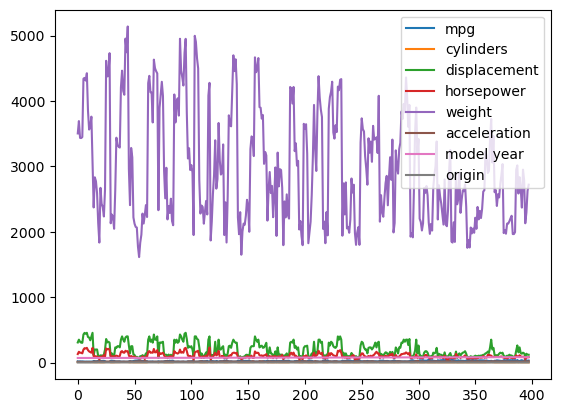

In [58]:
data.plot()

Let's look at the mpg distribution (a histogram)

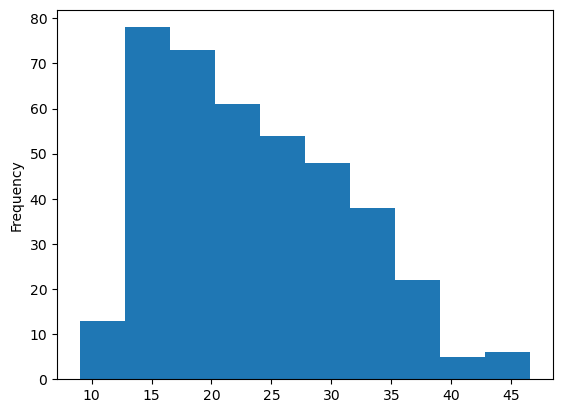

In [59]:
data['mpg'].plot.hist();

How many of each origin do we have?

In [60]:
data.origin.value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

Notice that we accessed the origin column with dot notation. This can be done whenever the column name is 'nice' enough to be a python variable name.

Do we have similar mpgs in each origin?  
Plotting three histograms for each origin side beside directly form the dataframe:

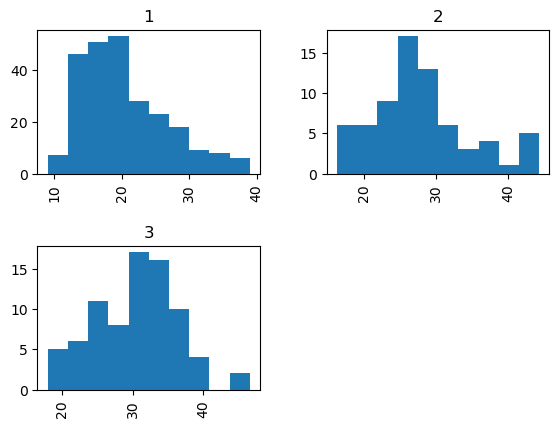

In [61]:
axs = data.hist(column='mpg', by='origin')

To format this plot, we can work on the axes (array) that is returned by the plot call. We use Matplotlib object oriented interface methods to do this

[Text(0.5, 1.0, 'origin = 3'), (0.0, 18.0)]

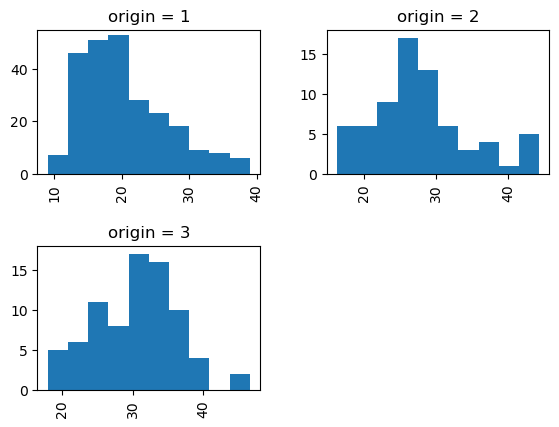

In [62]:
axs = data.hist(column='mpg', by='origin')
axs[0,0].set(title='origin = 1', ylim=[0, 55])
axs[0,1].set(title='origin = 2', ylim=[0, 18])
axs[1,0].set(title='origin = 3', ylim=[0, 18])

Is mpg and displacement correlated? Maybe it is different for each origin?  
Let's have a look with a scatter plot.

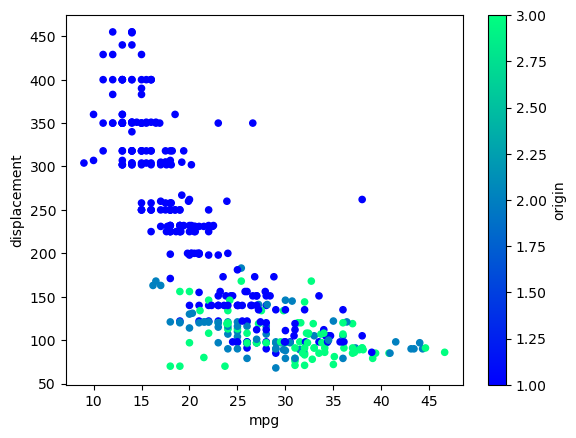

In [63]:
data.plot.scatter('mpg', 'displacement', c='origin', colormap='winter');

According to:  
https://stackoverflow.com/questions/43578976/pandas-missing-x-tick-labels

the missing x-labels are a pandas bug.

Workaraound is to create axes prior to calling plot

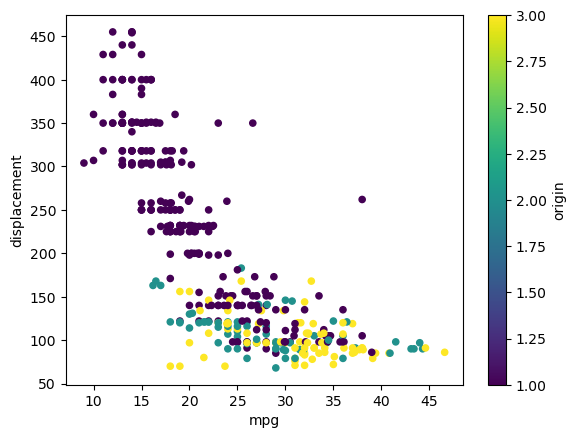

In [64]:
fig, ax = plt.subplots()
data.plot.scatter('mpg', 'displacement', c='origin', colormap='viridis', ax=ax);

It is a bit annoying that there is a colorbar, we know origin is categorical.

One way to avoid the colorbar is to loop over the categories and assign colors based on the category.

See:
https://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels-using-matplotlib

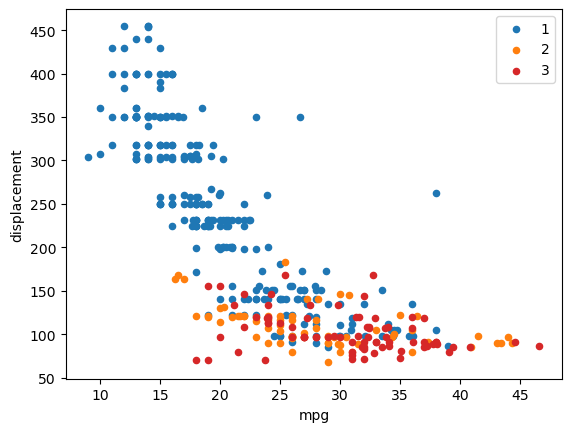

In [65]:
colors = {1: 'tab:blue', 2: 'tab:orange', 3: 'tab:red'}
fig, ax = plt.subplots()
for key, group in data.groupby(by='origin'):
    group.plot.scatter('mpg', 'displacement', c=colors[key], label=key, ax=ax);

## Seaborn 
>Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

http://seaborn.pydata.org/index.html

Seaborn is usually imported as `sns`

In [66]:
import seaborn as sns

Let's re-create the histograms by origin with seaborn with the figure level `displot()` function.

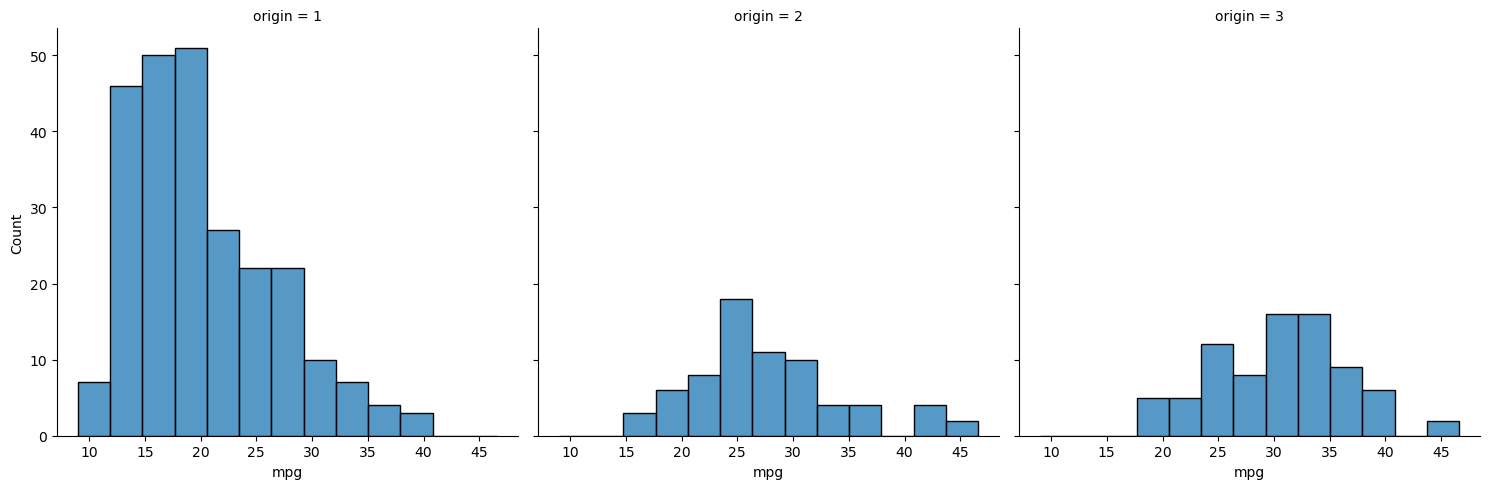

In [67]:
# Use origin to split mpg into columns
sns.displot(x='mpg', col='origin', data=data);

We can display the counts in the same plot, one on top of the other.

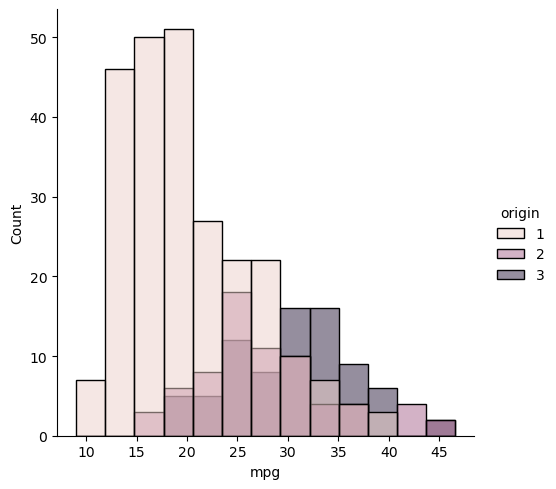

In [68]:
# Use origin to color (hue) in the same plot
sns.displot(x='mpg', hue='origin', data=data);

To have an idea of the split between origins, we can stack the counts, adding up to total.

/Users/justin/opt/anaconda3/envs/ensf-ml/lib/python3.9/site-packages/seaborn/distributions.py:254: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


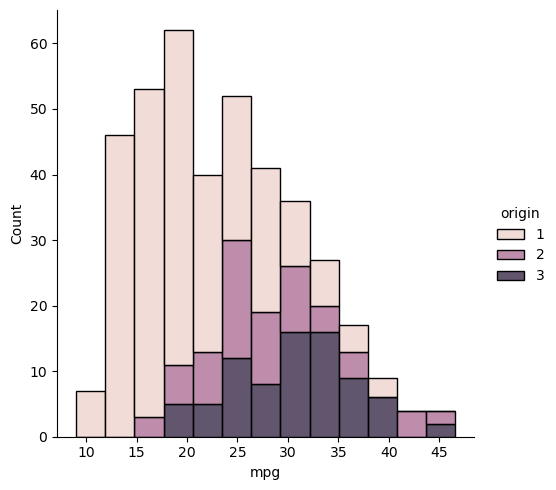

In [69]:
sns.displot(x='mpg', hue='origin', data=data, multiple='stack');

We can look at the differences in mpg with a boxplot too

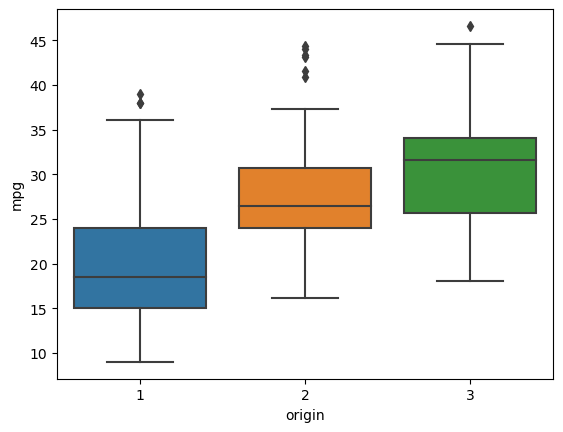

In [70]:
sns.boxplot(x='origin', y='mpg', data=data);

Let's re-create the scatter plot to see if mpg and displacement are correlated by origin.

To make the legend show strings we will create a origin string column with origin 1, 2, 3 strings rather than 1, 2, and 3.

In [71]:
data['origin_str'] = data['origin'].replace([1, 2, 3], ['origin = 1', 'origin = 2', 'origin = 3'])

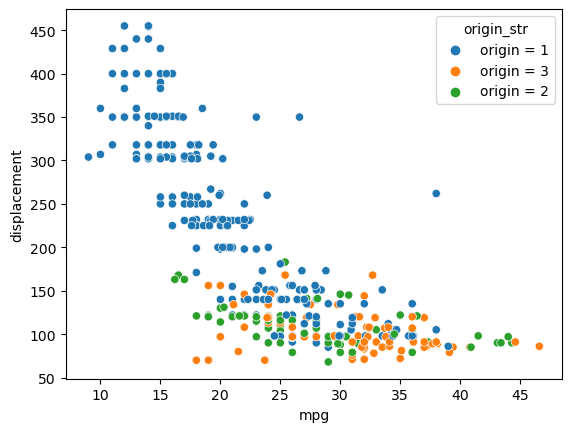

In [72]:
ax = sns.scatterplot(x='mpg', y='displacement', data=data, hue='origin_str')

Adding a regression line helps with visualizing the relationship

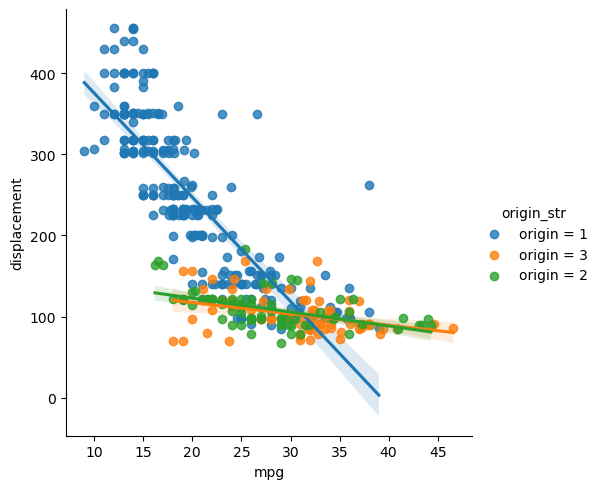

In [73]:
ax = sns.lmplot(x='mpg', y='displacement', data=data, hue='origin_str')

Maybe there are other correlations in the data set. Pairplot is a great way to get an overview

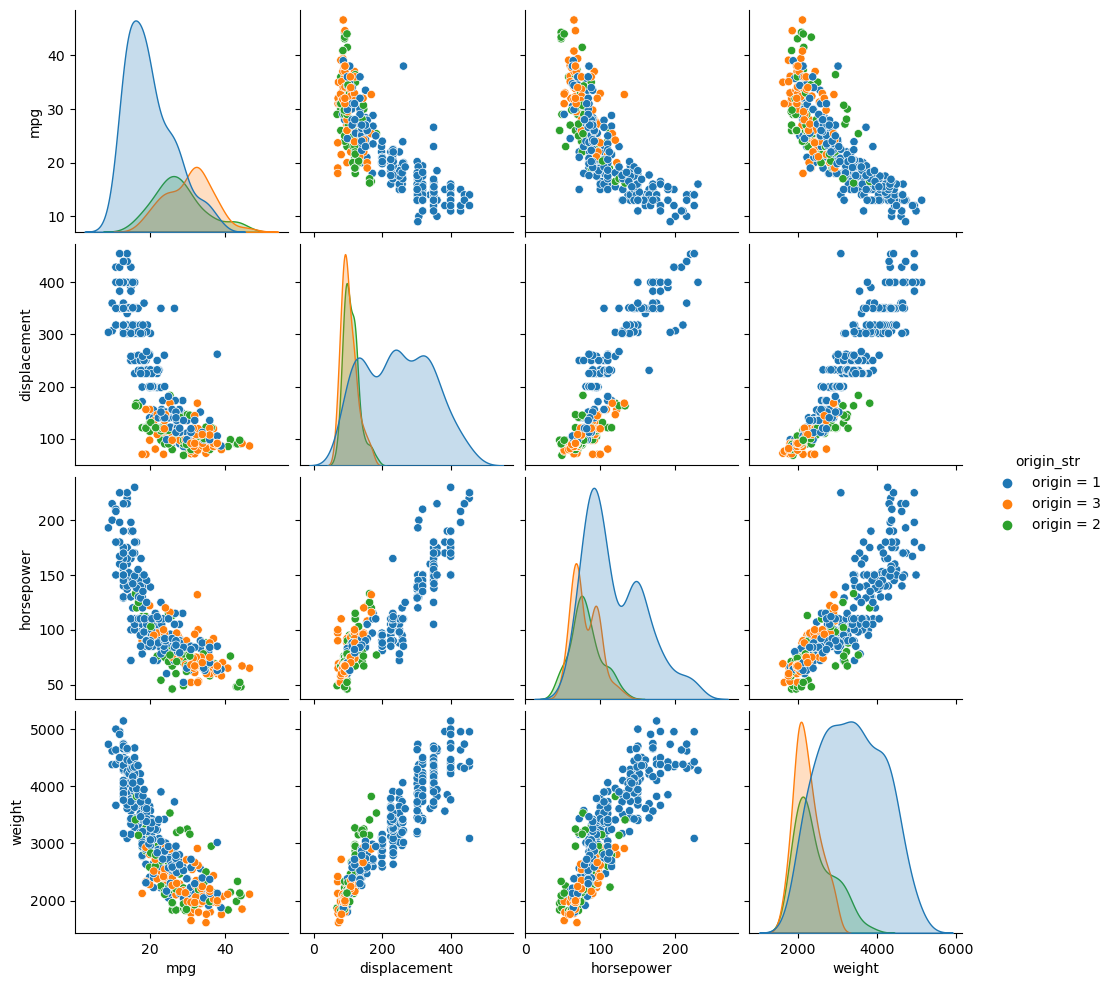

In [74]:
sns.pairplot(data, vars=['mpg', 'displacement', 'horsepower', 'weight'], hue='origin_str');

As an alternative, we can visualize the correlation matrix as a heatmap

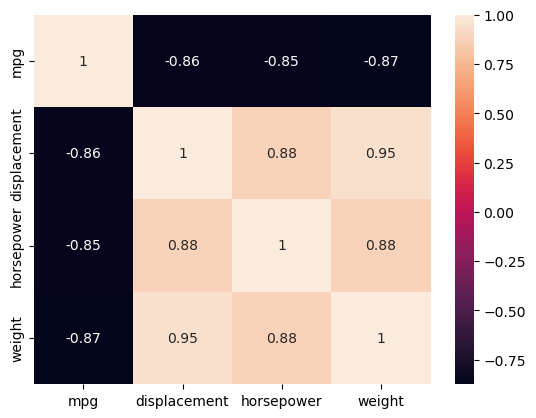

In [75]:
g = sns.heatmap(data[['mpg', 'displacement', 'horsepower', 'weight']].corr(method='spearman'), 
            annot=True)

There are nice tutorials on the Seaborn website, be sure to check these out.